In [35]:
import math
import numpy as np
from collections import defaultdict

import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader

import sys

sys.path.append('../')

from model_ae_tree_box_ab2_new_re_weight_lstm_print import *
import copy
import time
from tensorboardX import SummaryWriter
from visualization import *

In [36]:
trainset = TreeData(data_folder="../AETree_64.pickle", train=True, split=0.9, n_feature=512, num_box=64,
                    batch_size=50)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

testset = TreeData(data_folder="../AETree_64.pickle", train=False, split=0.9, n_feature=512, num_box=64,
                   batch_size=50)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

In [37]:
loader = test_loader
load_dir = '../best_dms/tree_lstm_64_test_61_2999'
test_model = AE.load_from_drive(AE, name=load_dir, model_dir='', device=torch.device('cuda'), n_feature=512)

In [38]:
testNum  = '1'

In [39]:
test_index = np.arange(10500,20000,2)

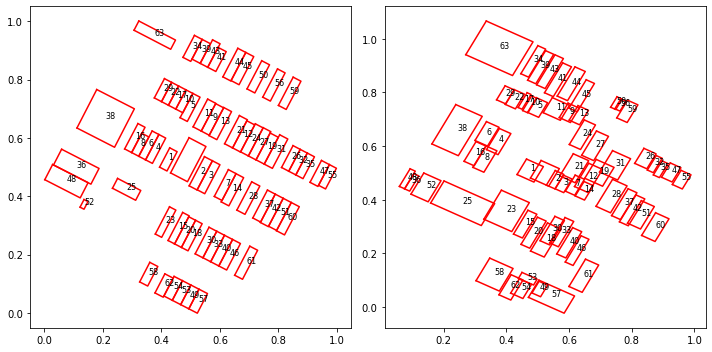

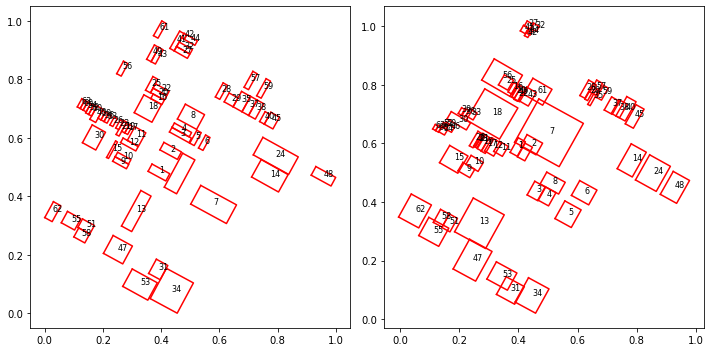

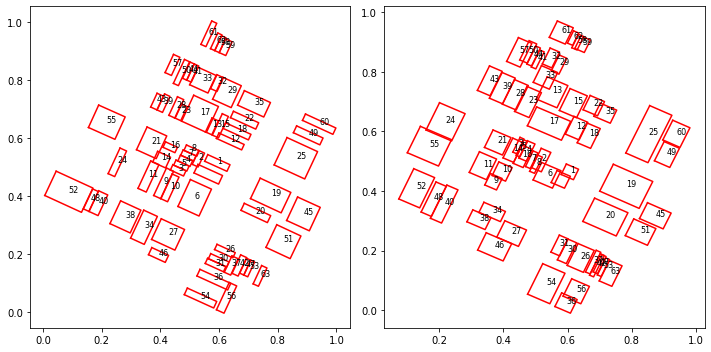

In [44]:
for index in [1,2,3]:
    for i, (X, I_list, Feature, Node_is_leaf) in enumerate(loader, 0):
        if (i == index):
            break
    X = X.squeeze(0)
    Feature = Feature.squeeze(0)
    Node_is_leaf = Node_is_leaf.squeeze(0)
    X = X.float()
    Feature = Feature.float()

    Feature_New = test_model.encode(X, Feature, I_list)
    X_r, X_ab_xy, X_ab_xy_r, Feature_r, Loss_P, Loss_Leaf, Num, _, _ = test_model.decode(X, Node_is_leaf,
                                                                                    Feature_New, I_list)

    X_ab_xy = X_ab_xy.detach().numpy()
    X_ab_xy_r = X_ab_xy_r.detach().numpy()

    N = 64  # change num_boxes
    N_total = 2 * N - 1

    X_tree0 = X_ab_xy[:N_total, :2]
    X_tree0_r = X_ab_xy_r[:N_total, :2]

    Feature_tree0 = X_ab_xy[:N_total, 2:]
    Feature_tree0_r = X_ab_xy_r[:N_total, 2:]

    box_list = []
    center_list = []
    txt_list = []
    color_list = []

    n = 1
    node_index = np.arange(N)
    color = np.zeros(len(node_index))
    P = X_tree0[node_index, :2]
    F = Feature_tree0[node_index]
    box = get_box_2(P, F)
    box_list.append(box)
    center_list.append(P)
    txt_list.append(node_index)
    color_list.append(color)

    P = X_tree0_r[node_index, :2]
    F = Feature_tree0_r[node_index]
    box = get_box_2(P, F)
    box_list.append(box)
    center_list.append(P)
    txt_list.append(node_index)
    color_list.append(color)
    fig_dir = '{0}_I{1}.jpg'.format(testNum,str(index))
    plot_boxes(box_list, txt_list, center_list, color_list, n, 2, test_num=testNum,
       save=False, savename=fig_dir)